# Experiment parameters

In [1]:
window_size = 288
train_prop = 0.8

# Load historical price data

In [2]:
import pandas as pd
import numpy as np

In [3]:
BTC_data = pd.read_csv('binance_datasets/BTC_data.csv')
ETH_data = pd.read_csv('binance_datasets/ETH_data.csv')

In [4]:
BTC_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,7195.24,7196.25,7178.64,7179.78,95.509133,1577837099999,686317.136252,1127,32.773245,235537.295045,0
1,2020-01-01 00:05:00,7179.76,7191.77,7178.20,7191.07,59.365225,1577837399999,426481.260364,631,24.766513,177935.618201,0
2,2020-01-01 00:10:00,7193.15,7193.53,7180.24,7180.97,48.068510,1577837699999,345446.503019,694,19.422283,139596.621683,0
3,2020-01-01 00:15:00,7180.97,7186.40,7177.35,7178.29,32.192929,1577837999999,231162.555424,576,12.963258,93091.433276,0
4,2020-01-01 00:20:00,7177.71,7182.46,7175.47,7176.96,49.027397,1577838299999,351927.893881,710,22.819744,163817.881155,0


In [5]:
ETH_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,129.16,129.19,128.80,128.88,696.71412,1577837099999,89878.706140,278,374.55660,48313.962330,0
1,2020-01-01 00:05:00,128.84,128.95,128.69,128.93,724.37040,1577837399999,93302.364520,298,277.02182,35691.253799,0
2,2020-01-01 00:10:00,128.93,128.98,128.80,128.91,462.49462,1577837699999,59607.158976,203,223.12403,28749.907229,0
3,2020-01-01 00:15:00,128.91,129.05,128.84,128.85,360.50849,1577837999999,46478.320289,224,223.46932,28810.088623,0
4,2020-01-01 00:20:00,128.85,128.91,128.69,128.72,1827.53848,1577838299999,235286.623182,244,917.60510,118124.990547,0


In [6]:
print(f"Length of BTC data: {len(BTC_data)}")
print(f"Length of ETH data: {len(ETH_data)}")

Length of BTC data: 200000
Length of ETH data: 200000


In [7]:
# Get the closing prices
BTC_close = BTC_data['close']
ETH_close = ETH_data['close']

# Create closing prices matrix
closing_prices = np.column_stack((BTC_close, ETH_close))
print(closing_prices.shape)

(200000, 2)


In [8]:
# Split the data into training and testing sets
train_size = int(train_prop * closing_prices.shape[0])
train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:]

# Split original dataframes
BTC_train = BTC_data[:train_size]
BTC_test = BTC_data[train_size:]
ETH_train = ETH_data[:train_size]
ETH_test = ETH_data[train_size:]

print(f"Length of training data: {len(train_data)}")
print(f"Length of testing data: {len(test_data)}")

Length of training data: 160000
Length of testing data: 40000


# Save to json

In [9]:
from train_data_generation import create_train_json

# Create json sequences files for training and testing data
create_train_json(BTC_train, "binance_datasets/BTC_train.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_train, "binance_datasets/ETH_train.json", window_size=window_size, max_samples=np.inf)

create_train_json(BTC_test, "binance_datasets/BTC_test.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_test, "binance_datasets/ETH_test.json", window_size=window_size, max_samples=np.inf)

/users/eleves-b/2022/wajdi.maatouk/EA_DL_project/train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])
Processing: 100%|██████████| 159712/159712 [00:02<00:00, 58631.10 samples/s]


Saved 159553 samples to binance_datasets/BTC_train.json


Processing: 100%|██████████| 159712/159712 [00:02<00:00, 54601.74 samples/s]


Saved 159553 samples to binance_datasets/ETH_train.json


Processing: 100%|██████████| 39712/39712 [00:00<00:00, 71833.87 samples/s]


Saved 39673 samples to binance_datasets/BTC_test.json


Processing: 100%|██████████| 39712/39712 [00:00<00:00, 66464.04 samples/s]


Saved 39673 samples to binance_datasets/ETH_test.json


# Train linear prediction model

In [1]:
import train_linear_model

args = train_linear_model.Args(
    model_path = "models/btc_linear_model.pth",
    train_path = "binance_datasets/BTC_train.json",
    test_path = "binance_datasets/BTC_test.json",
    epochs = 500,
    lr = 2*1e-5
)

[Epoch 1/500] Train MSE: 4977074.0252 | Val MSE: 978914.7915
[Epoch 2/500] Train MSE: 628206.8861 | Val MSE: 957804.9052
[Epoch 3/500] Train MSE: 612126.5758 | Val MSE: 929849.5358
[Epoch 4/500] Train MSE: 590067.3148 | Val MSE: 896741.5429
[Epoch 5/500] Train MSE: 561629.8068 | Val MSE: 837414.5378
[Epoch 6/500] Train MSE: 524362.1796 | Val MSE: 790669.4899
[Epoch 7/500] Train MSE: 481157.7909 | Val MSE: 705972.2585
[Epoch 8/500] Train MSE: 432535.6616 | Val MSE: 635953.2553
[Epoch 9/500] Train MSE: 382656.4166 | Val MSE: 563717.7308
[Epoch 10/500] Train MSE: 334524.7724 | Val MSE: 486479.9505
[Epoch 11/500] Train MSE: 293137.1456 | Val MSE: 431251.7385
[Epoch 12/500] Train MSE: 259864.7722 | Val MSE: 405805.1654
[Epoch 13/500] Train MSE: 235079.8127 | Val MSE: 356424.1689
[Epoch 14/500] Train MSE: 217165.1953 | Val MSE: 344697.4676
[Epoch 15/500] Train MSE: 203471.3299 | Val MSE: 311820.6592
[Epoch 16/500] Train MSE: 193604.1713 | Val MSE: 298378.1390
[Epoch 17/500] Train MSE: 185108

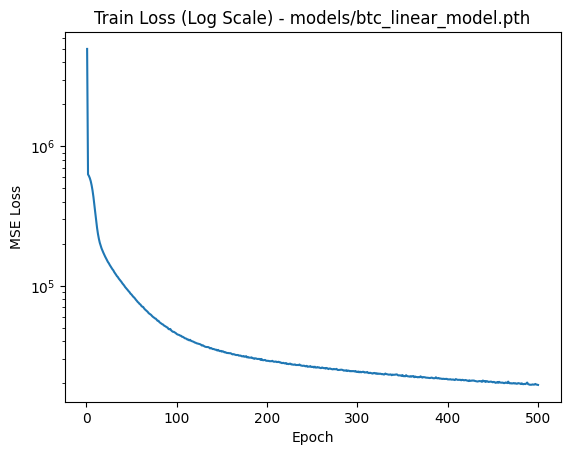

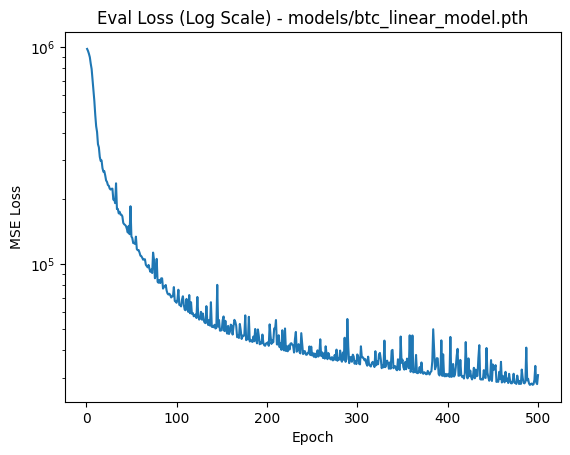

In [2]:
btc_linear_model = train_linear_model.main(args)

In [3]:
args = train_linear_model.Args(
    model_path = "models/eth_linear_model.pth",
    train_path = "binance_datasets/ETH_train.json",
    test_path = "binance_datasets/ETH_test.json",
    epochs = 500,
    lr = 2*1e-5
)

[Epoch 1/500] Train MSE: 291530.5921 | Val MSE: 6190.9737
[Epoch 2/500] Train MSE: 2448.3083 | Val MSE: 6143.0701
[Epoch 3/500] Train MSE: 2426.4019 | Val MSE: 6059.4408
[Epoch 4/500] Train MSE: 2394.7270 | Val MSE: 5994.0155
[Epoch 5/500] Train MSE: 2352.4911 | Val MSE: 5864.9793
[Epoch 6/500] Train MSE: 2292.2376 | Val MSE: 5681.9671
[Epoch 7/500] Train MSE: 2215.2630 | Val MSE: 5437.3983
[Epoch 8/500] Train MSE: 2116.9647 | Val MSE: 5210.6830
[Epoch 9/500] Train MSE: 1992.0565 | Val MSE: 4837.0259
[Epoch 10/500] Train MSE: 1844.6263 | Val MSE: 4512.8739
[Epoch 11/500] Train MSE: 1676.0691 | Val MSE: 4232.2690
[Epoch 12/500] Train MSE: 1492.3462 | Val MSE: 3558.7771
[Epoch 13/500] Train MSE: 1307.7512 | Val MSE: 3127.1674
[Epoch 14/500] Train MSE: 1142.3757 | Val MSE: 2731.3373
[Epoch 15/500] Train MSE: 1001.5567 | Val MSE: 2451.1252
[Epoch 16/500] Train MSE: 890.6675 | Val MSE: 2186.1599
[Epoch 17/500] Train MSE: 803.8211 | Val MSE: 2056.4175
[Epoch 18/500] Train MSE: 738.5180 | Val

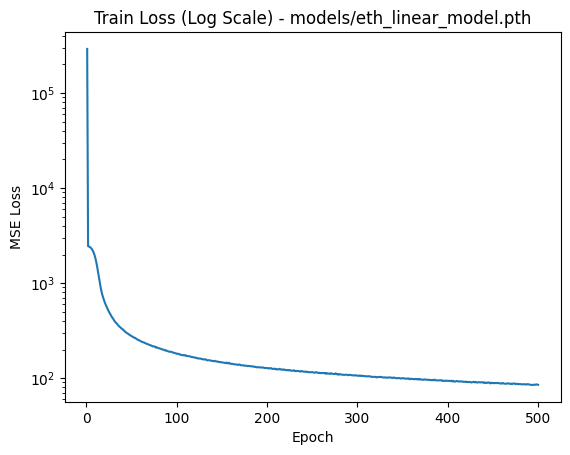

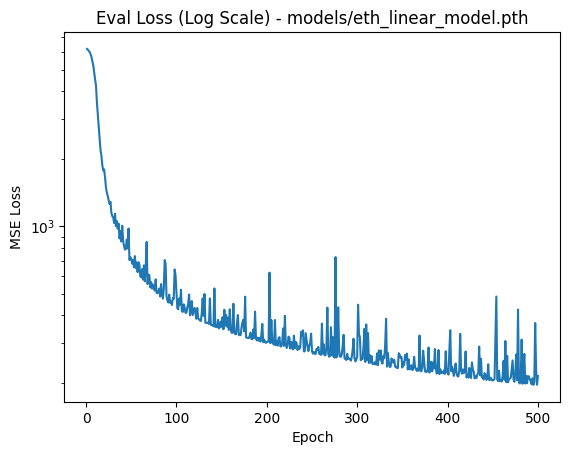

In [4]:
eth_linear_model = train_linear_model.main(args)

# Run training experiment

In [10]:
import ppo
import torch

btc_linear_model = torch.load("models/btc_linear_model.pth")
eth_linear_model = torch.load("models/eth_linear_model.pth")
prediction_models = [btc_linear_model, eth_linear_model]

# Experiment arguments
args = ppo.Args(
    exp_name="experiment_1",         # name of this experiment
    seed=1,                          # random seed
    torch_deterministic=True,        # if True, sets torch.backends.cudnn.deterministic = False
    cuda=True,                       # if True, CUDA will be enabled by default
    track=False,                     # if True, track experiment with Weights & Biases

    # Environment specific arguments
    n_assets=2,                      # number of assets in the portfolio
    window_size=window_size,         # size of the historical‐price window (observation dimension)
    action_step_size=0.1,            # step size for actions
    episode_length=100,              # length of each episode
    reward_method="portfolio_value", # reward method: "portfolio_value" or "sharpe_ratio"
    g1=0.5,                          # weight for Sharpe ratio in combined reward
    g2=0.5,                          # weight for portfolio return in combined reward
    closing_prices=train_data,                    # array of historical closing prices for all assets
    prediction_method="regression",               # prediction method: "regression" or "directional"
    prediction_models=prediction_models,          # optional external model for price predictions

    # Algorithm specific arguments
    env_id="PortfolioEnv-v0",        # gym environment ID
    total_timesteps=200000,          # total timesteps for training
    learning_rate=2.5e-4,            # learning rate for the optimizer
    num_envs=4,                      # number of parallel environments
    num_steps=128,                   # steps per environment rollout before update
    anneal_lr=True,                  # if True, linearly anneals learning rate
    gamma=0.99,                      # discount factor for rewards
    gae_lambda=0.95,                 # lambda parameter for GAE (advantage estimation)
    num_minibatches=4,               # number of minibatches per update epoch
    update_epochs=4,                 # number of update epochs (K epochs in PPO)
    norm_adv=True,                   # if True, normalize advantages
    clip_coef=0.2,                   # clipping coefficient for PPO surrogate objective
    clip_vloss=True,                 # if True, clip value function updates
    ent_coef=0.01,                   # entropy bonus coefficient
    vf_coef=0.5,                     # value loss coefficient
    max_grad_norm=0.5,               # max gradient norm (gradient clipping)
    target_kl=None,                  # KL divergence threshold for early stopping

    # Computed at runtime
    batch_size=0,                    # batch size (computed internally from num_envs & num_steps)
    minibatch_size=0,                # minibatch size (computed internally)
    num_iterations=0                 # number of iterations (computed internally)
)


TypeError: __init__() got an unexpected keyword argument 'prediction_models'

In [ ]:
ppo.main(args)

# Evaluate model

In [2]:
print("Hello")

Hello
